In [ ]:
!python extraction.py

In [4]:
import os
import pandas as pd

# Folder containing the CSV files
folder_path = 'public_dataset/train/price_data'

# Dictionary to hold dataframes with respect to CSV names
train_dataframes_pd = {}

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a CSV
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Create a key using the filename without '.csv'
        key = filename[:-4]  # Removes '.csv' from the filename
        
        # Save dataframe to dictionary
        train_dataframes_pd[key] = df
        
        # Optionally print out confirmation
        print(f"DataFrame for {filename} saved as '{key}'")

# Example: Accessing a specific dataframe by its filename (without .csv)
train_dataframes_pd['AGI'].head()

DataFrame for AGI.csv saved as 'AGI'
DataFrame for AUC.csv saved as 'AUC'
DataFrame for BCN.csv saved as 'BCN'
DataFrame for BNT.csv saved as 'BNT'
DataFrame for BZRX.csv saved as 'BZRX'
DataFrame for CELR.csv saved as 'CELR'
DataFrame for CGLD.csv saved as 'CGLD'
DataFrame for CHAT.csv saved as 'CHAT'
DataFrame for CHR.csv saved as 'CHR'
DataFrame for CKB.csv saved as 'CKB'
DataFrame for DAI.csv saved as 'DAI'
DataFrame for DIA.csv saved as 'DIA'
DataFrame for DMG.csv saved as 'DMG'
DataFrame for DOTUP.csv saved as 'DOTUP'
DataFrame for DX.csv saved as 'DX'
DataFrame for ENJ.csv saved as 'ENJ'
DataFrame for ETP.csv saved as 'ETP'
DataFrame for FUEL.csv saved as 'FUEL'
DataFrame for GBP.csv saved as 'GBP'
DataFrame for HSC.csv saved as 'HSC'
DataFrame for KIN.csv saved as 'KIN'
DataFrame for KMD.csv saved as 'KMD'
DataFrame for LEND.csv saved as 'LEND'
DataFrame for MBL.csv saved as 'MBL'
DataFrame for NEST.csv saved as 'NEST'
DataFrame for NPXS.csv saved as 'NPXS'
DataFrame for OCEAN.

,datetime,low_x,high_x,volumefrom_x,volumeto_x,open_x,close_x
0,2018-05-09,0.1925,0.1978,100276.48,19590.32,0.1950,0.1976
1,2018-05-10,0.1898,0.2021,257706.15,50858.22,0.1976,0.1900
2,2018-05-11,0.1650,0.1900,221642.18,38961.70,0.1900,0.1790
3,2018-05-12,0.1713,0.1909,203227.76,36755.37,0.1790,0.1789
4,2018-05-13,0.1777,0.1850,95652.78,17293.95,0.1789,0.1847


In [5]:
# Folder containing the CSV files
folder_path = 'public_dataset/test/price_data'

# Dictionary to hold dataframes with respect to CSV names
test_dataframes_pd = {}

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a CSV
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Create a key using the filename without '.csv'
        key = filename[:-4]  # Removes '.csv' from the filename
        
        # Save dataframe to dictionary
        test_dataframes_pd[key] = df
        
        # Optionally print out confirmation
        print(f"DataFrame for {filename} saved as '{key}'")

# Example: Accessing a specific dataframe by its filename (without .csv)
test_dataframes_pd['AGI'].head()

DataFrame for AGI.csv saved as 'AGI'
DataFrame for AUC.csv saved as 'AUC'
DataFrame for BCN.csv saved as 'BCN'
DataFrame for BNT.csv saved as 'BNT'
DataFrame for BZRX.csv saved as 'BZRX'
DataFrame for CELR.csv saved as 'CELR'
DataFrame for CGLD.csv saved as 'CGLD'
DataFrame for CHAT.csv saved as 'CHAT'
DataFrame for CHR.csv saved as 'CHR'
DataFrame for CKB.csv saved as 'CKB'
DataFrame for DAI.csv saved as 'DAI'
DataFrame for DIA.csv saved as 'DIA'
DataFrame for DMG.csv saved as 'DMG'
DataFrame for DOTUP.csv saved as 'DOTUP'
DataFrame for DX.csv saved as 'DX'
DataFrame for ENJ.csv saved as 'ENJ'
DataFrame for ETP.csv saved as 'ETP'
DataFrame for FUEL.csv saved as 'FUEL'
DataFrame for GBP.csv saved as 'GBP'
DataFrame for HSC.csv saved as 'HSC'
DataFrame for KIN.csv saved as 'KIN'
DataFrame for KMD.csv saved as 'KMD'
DataFrame for LEND.csv saved as 'LEND'
DataFrame for MBL.csv saved as 'MBL'
DataFrame for NEST.csv saved as 'NEST'
DataFrame for NPXS.csv saved as 'NPXS'
DataFrame for OCEAN.

,datetime
0,2018-07-28
1,2018-07-29
2,2018-07-30
3,2018-07-31
4,2018-08-01


In [15]:
# After loading the train and test dataframes
# Combine train and test dataframes into a new dictionary
combined_dataframes_pd = {}

# Loop through each key in the train dataframes
for key, train_df in train_dataframes_pd.items():
    # Add is_test column for training data
    train_df['is_test'] = False
    combined_dataframes_pd[key] = train_df

# Loop through each key in the test dataframes
for key, test_df in test_dataframes_pd.items():
    # Create a new dataframe with the same columns as the training dataframe
    # Fill other columns with NaN
    if key in combined_dataframes_pd:
        test_structure_df = pd.DataFrame(columns=combined_dataframes_pd[key].columns)
        test_structure_df['datetime'] = test_df['datetime']
        test_structure_df['is_test'] = True
        
        # Fill other columns with NaN
        for col in combined_dataframes_pd[key].columns:
            if col not in ['datetime', 'is_test']:
                test_structure_df[col] = pd.NA
        
        # Append the test dataframe to the combined dataframes
        combined_dataframes_pd[key] = pd.concat([combined_dataframes_pd[key], test_structure_df], ignore_index=True)

# Fill in missing dates for each combined dataframe
for key, combined_df in combined_dataframes_pd.items():
    # Ensure 'datetime' is of type datetime64[ns]
    combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])
    
    # Create a complete date range from the minimum to maximum date
    full_date_range = pd.date_range(start=combined_df['datetime'].min(), end=combined_df['datetime'].max())
    
    # Create a new dataframe with the full date range
    full_df = pd.DataFrame(full_date_range, columns=['datetime'])
    
    # Ensure 'datetime' in full_df is also of type datetime64[ns]
    full_df['datetime'] = pd.to_datetime(full_df['datetime'])
    
    # Merge with the combined dataframe to fill in missing dates
    combined_df = full_df.merge(combined_df, on='datetime', how='left')
    
    # Set is_test to False for the newly added rows
    combined_df['is_test'] = combined_df['is_test'].fillna(False)
    
    # Fill other columns with NaN where they are missing
    for col in combined_df.columns:
        if col not in ['datetime', 'is_test']:
            combined_df[col] = combined_df[col].fillna(pd.NA)
    
    # Update the combined_dataframes_pd with the filled dataframe
    combined_dataframes_pd[key] = combined_df

# Example: Accessing a specific combined dataframe by its filename (without .csv)
combined_dataframes_pd['AGI'].head()

C:\Users\roovy\AppData\Local\Temp\ipykernel_3468\3275348822.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_dataframes_pd[key] = pd.concat([combined_dataframes_pd[key], test_structure_df], ignore_index=True)
C:\Users\roovy\AppData\Local\Temp\ipykernel_3468\3275348822.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_dataframes_pd[key] = pd.concat([combined_dataframes_pd[key], test_structure_df], ignore_index=True)
C:\Users\roovy\AppData\Local\Temp\ipykernel_3468\3275348

,datetime,low_x,high_x,volumefrom_x,volumeto_x,open_x,close_x,is_test
0,2018-05-09,0.1925,0.1978,100276.48,19590.32,0.1950,0.1976,False
1,2018-05-10,0.1898,0.2021,257706.15,50858.22,0.1976,0.1900,False
2,2018-05-11,0.1650,0.1900,221642.18,38961.70,0.1900,0.1790,False
3,2018-05-12,0.1713,0.1909,203227.76,36755.37,0.1790,0.1789,False
4,2018-05-13,0.1777,0.1850,95652.78,17293.95,0.1789,0.1847,False


In [16]:
# Check the number of rows where is_test is False and close_x is NaN
for key, combined_df in combined_dataframes_pd.items():
    count = combined_df[(combined_df['is_test'] == False) & (combined_df['close_x'].isna())].shape[0]
    print(f"Crypto: {key}, Count of is_test=False and close_x is NaN: {count}")

Crypto: AGI, Count of is_test=False and close_x is NaN: 100
Crypto: AUC, Count of is_test=False and close_x is NaN: 102
Crypto: BCN, Count of is_test=False and close_x is NaN: 140
Crypto: BNT, Count of is_test=False and close_x is NaN: 151
Crypto: BZRX, Count of is_test=False and close_x is NaN: 17
Crypto: CELR, Count of is_test=False and close_x is NaN: 49
Crypto: CGLD, Count of is_test=False and close_x is NaN: 0
Crypto: CHAT, Count of is_test=False and close_x is NaN: 114
Crypto: CHR, Count of is_test=False and close_x is NaN: 31
Crypto: CKB, Count of is_test=False and close_x is NaN: 30
Crypto: DAI, Count of is_test=False and close_x is NaN: 51
Crypto: DIA, Count of is_test=False and close_x is NaN: 12
Crypto: DMG, Count of is_test=False and close_x is NaN: 11
Crypto: DOTUP, Count of is_test=False and close_x is NaN: 10
Crypto: DX, Count of is_test=False and close_x is NaN: 50
Crypto: ENJ, Count of is_test=False and close_x is NaN: 71
Crypto: ETP, Count of is_test=False and close_x

In [49]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Assuming combined_dataframes_pd is already defined and contains the necessary data

# Function to create features and labels for time series prediction
def create_time_series_data(df, window_size, horizon):
    X, y = [], []
    for i in range(len(df) - window_size - horizon + 1):
        X.append(df['close_x'].iloc[i:i + window_size].values)
        y.append(df['close_x'].iloc[i + window_size + horizon - 1])
    return np.array(X), np.array(y)

# Loop through each combined dataframe to predict close_x
for key, combined_df in combined_dataframes_pd.items():
    # Filter out rows where close_x is NaN
    train_df = combined_df[combined_df['close_x'].notna()]
    
    # Create features and labels
    X, y = create_time_series_data(train_df, window_size=7, horizon=1)
    
    # Train the XGBoost model
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X, y)
    
    # Predicting the NaN values
    for i in range(len(combined_df)):
        if pd.isna(combined_df['close_x'].iloc[i]):
            # Prepare the input for prediction
            if i >= 7:  # Ensure we have enough previous data
                input_data = combined_df['close_x'].iloc[i-7:i].values.reshape(1, -1)
                predicted_value = model.predict(input_data)
                combined_df['close_x'].iloc[i] = predicted_value[0]

    # Update the combined_dataframes_pd with the filled dataframe
    combined_dataframes_pd[key] = combined_df

# Example: Accessing a specific combined dataframe by its filename (without .csv)
combined_dataframes_pd['AGI'].head()

,datetime,low_x,high_x,volumefrom_x,volumeto_x,open_x,close_x,is_test
0,2018-05-09,0.1925,0.1978,100276.48,19590.32,0.1950,0.1976,False
1,2018-05-10,0.1898,0.2021,257706.15,50858.22,0.1976,0.1900,False
2,2018-05-11,0.1650,0.1900,221642.18,38961.70,0.1900,0.1790,False
3,2018-05-12,0.1713,0.1909,203227.76,36755.37,0.1790,0.1789,False
4,2018-05-13,0.1777,0.1850,95652.78,17293.95,0.1789,0.1847,False


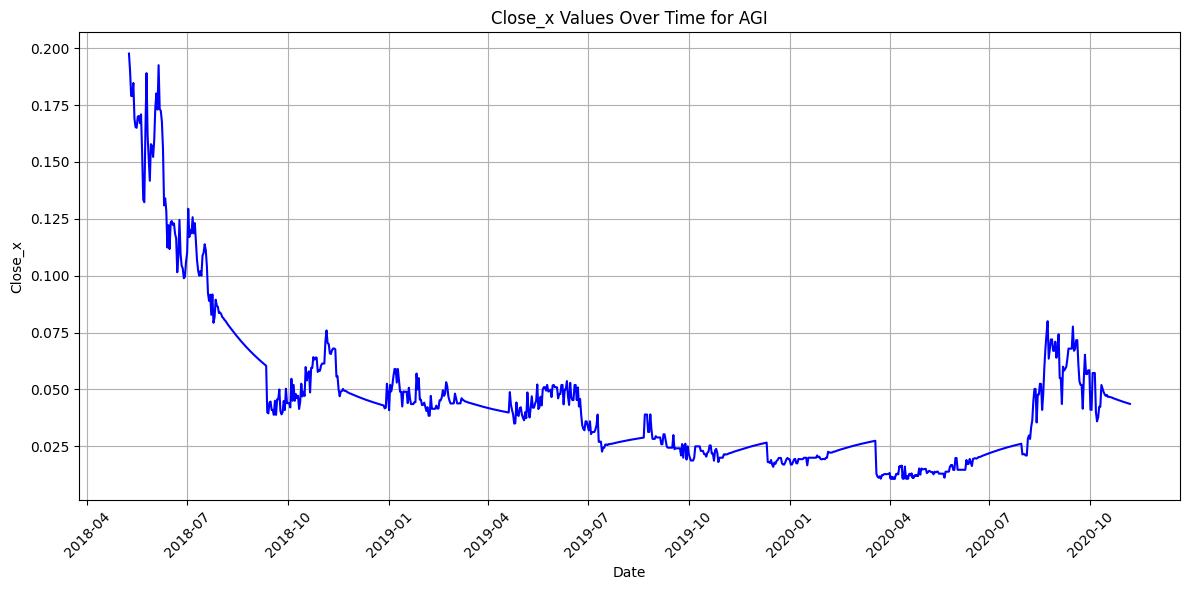

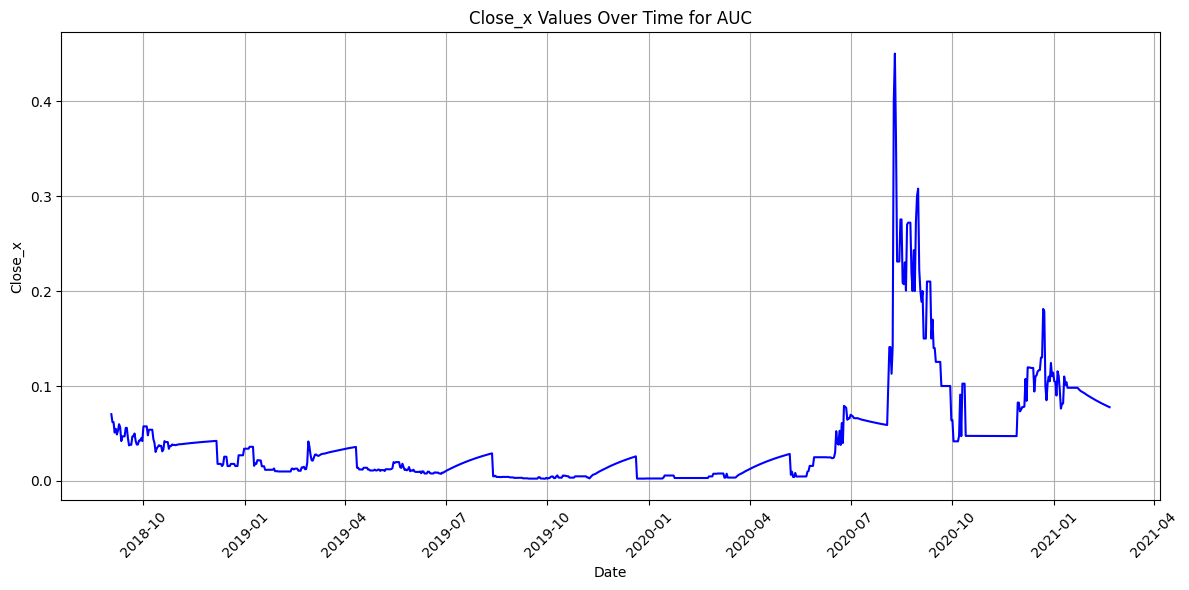

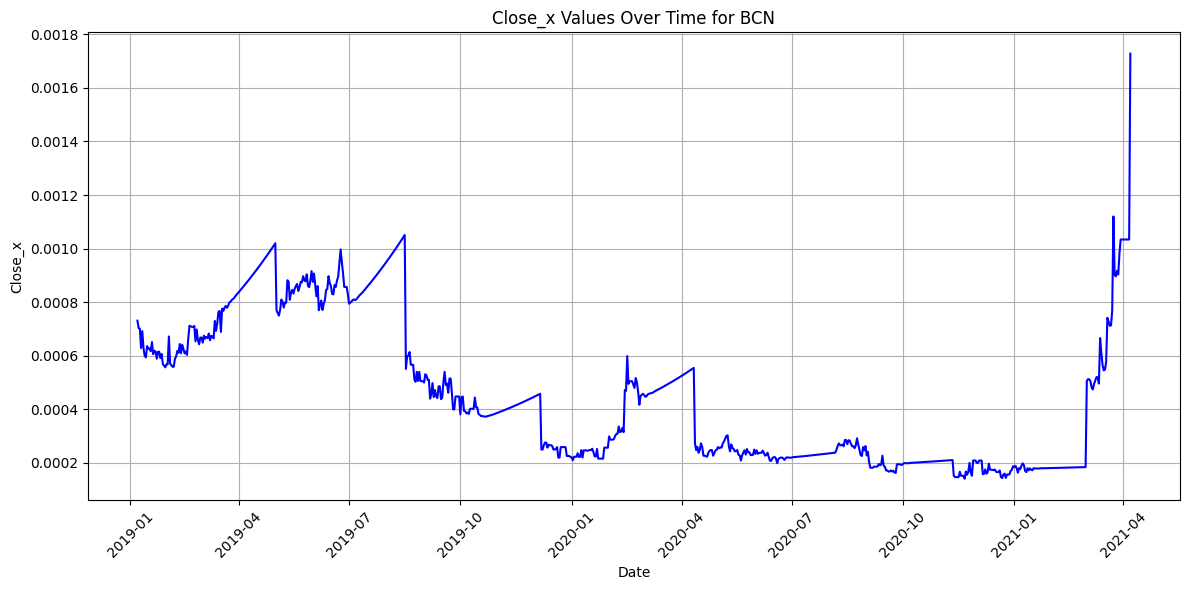

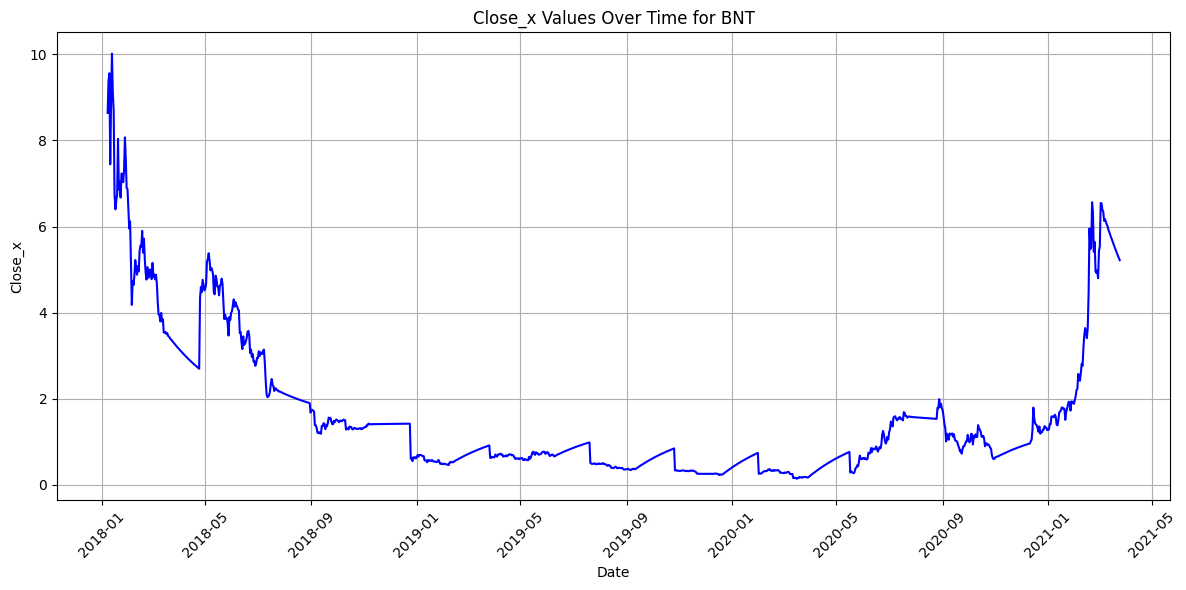

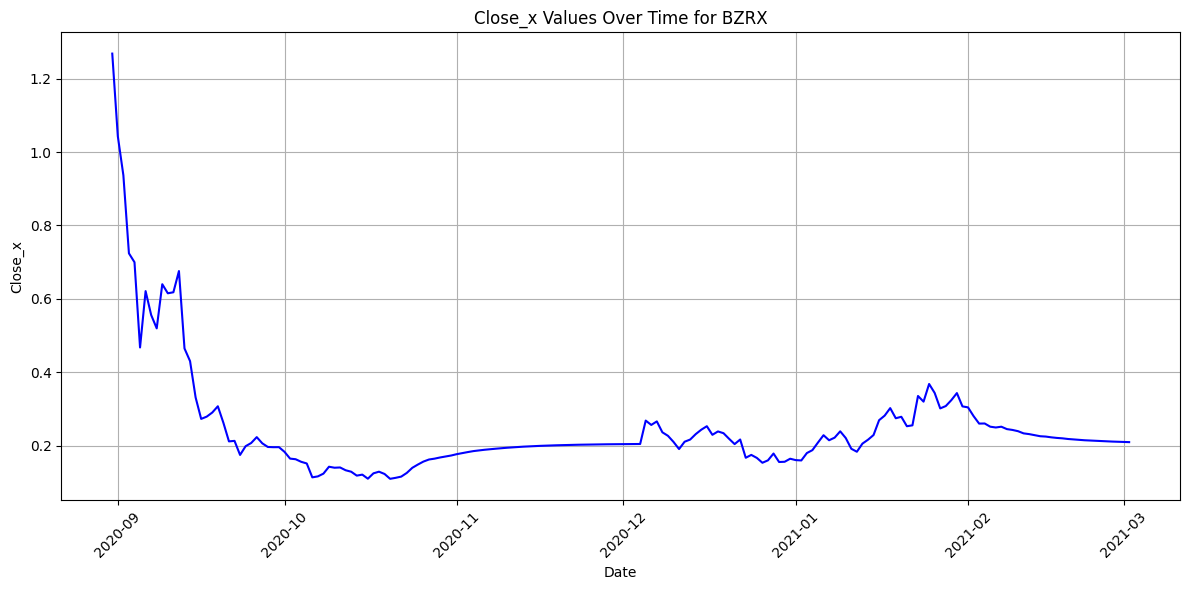

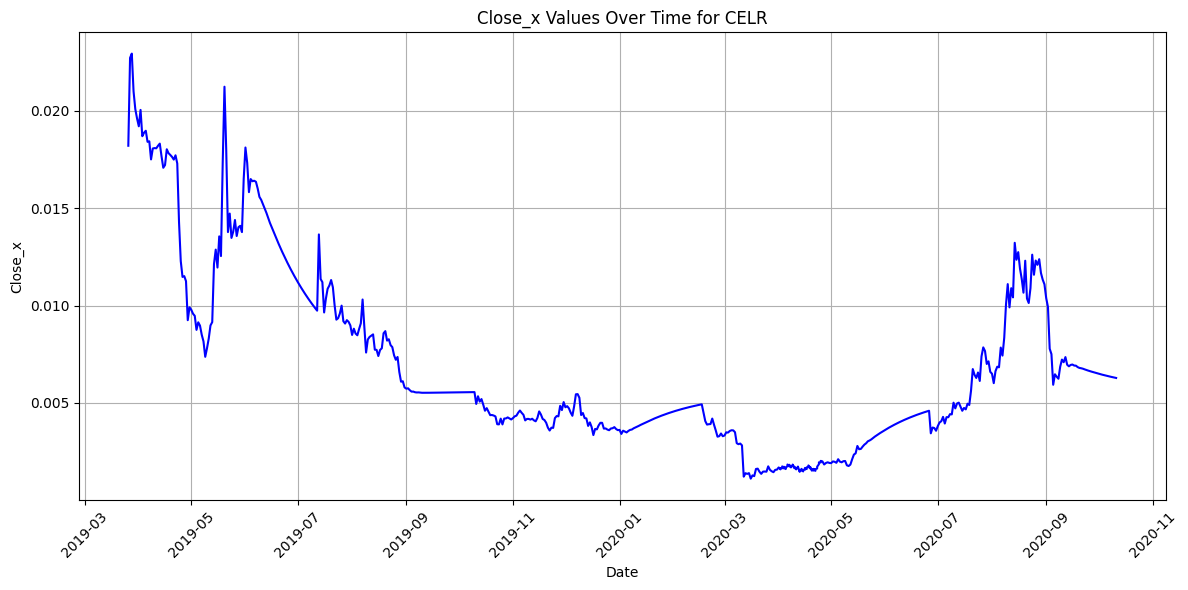

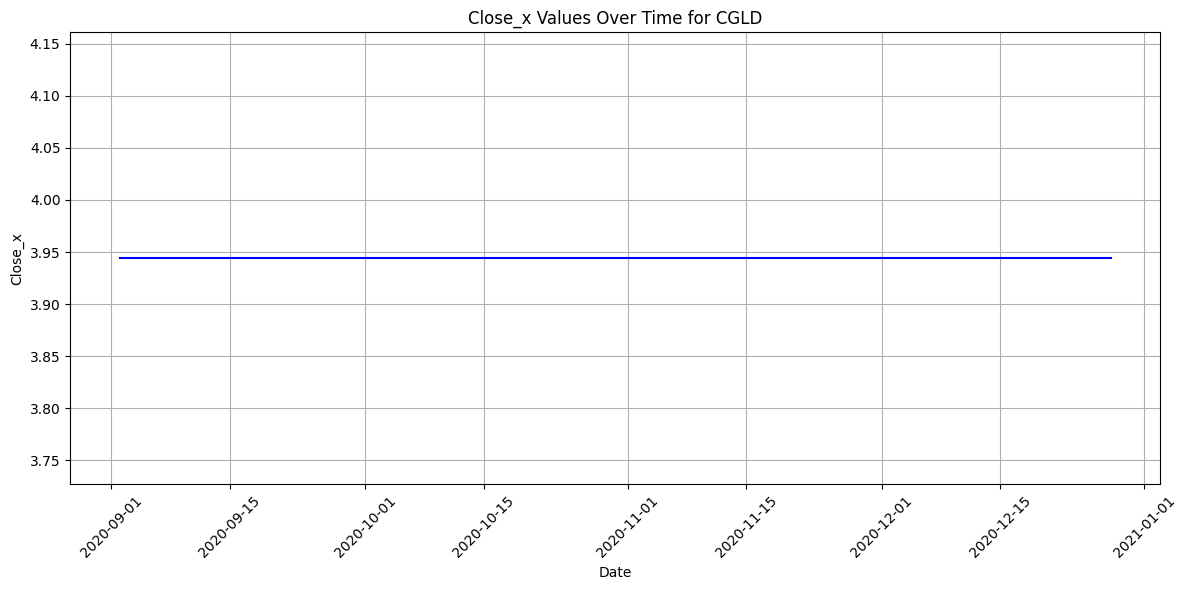

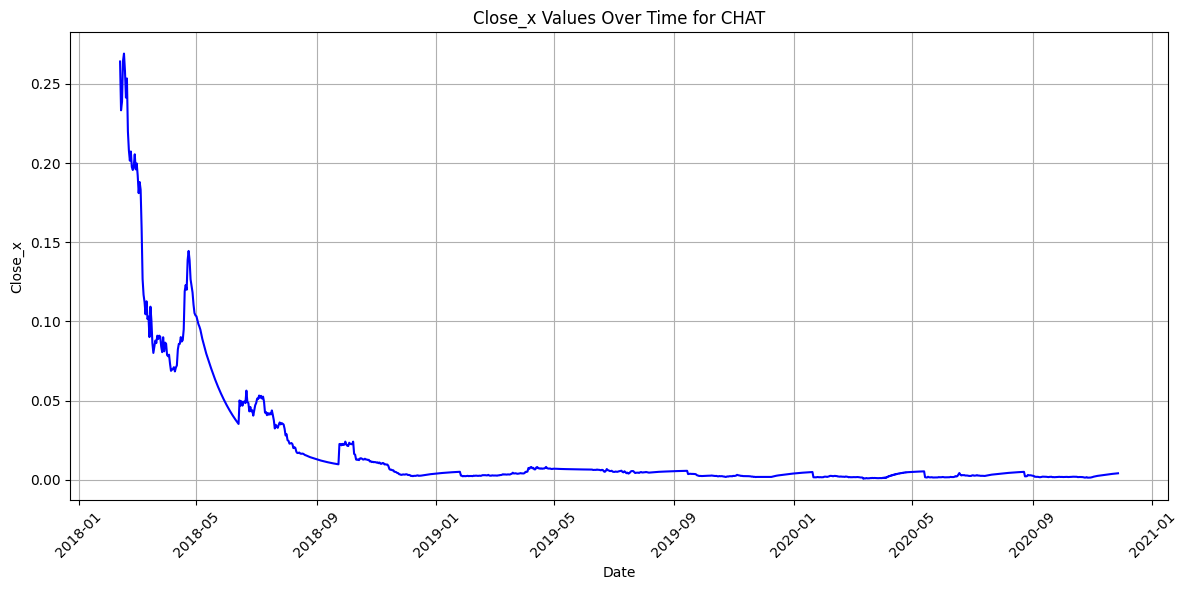

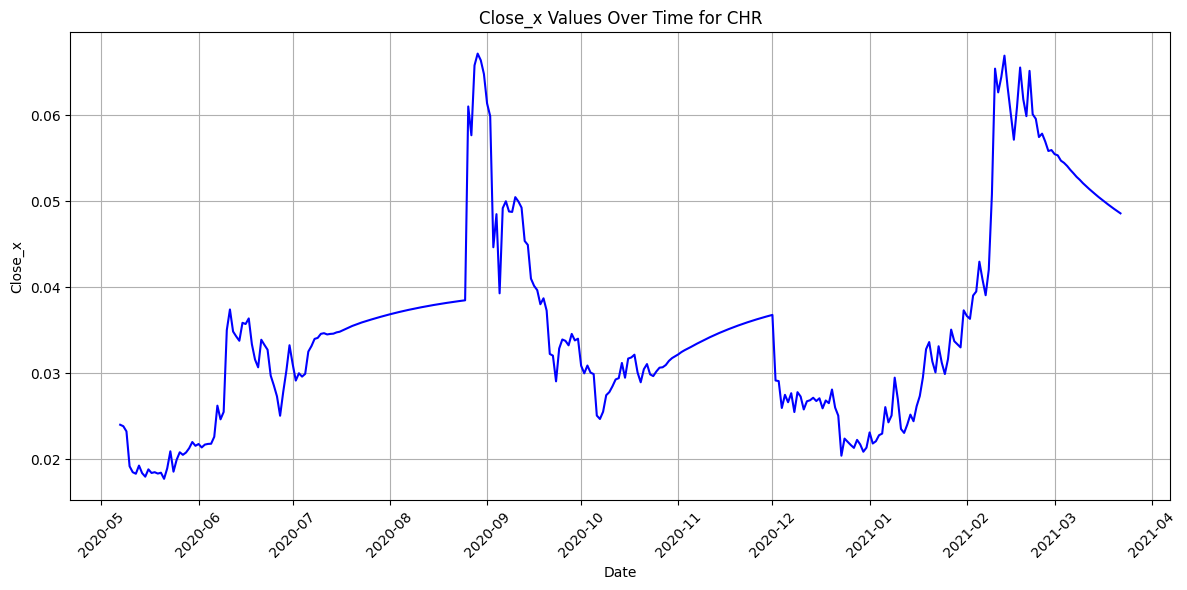

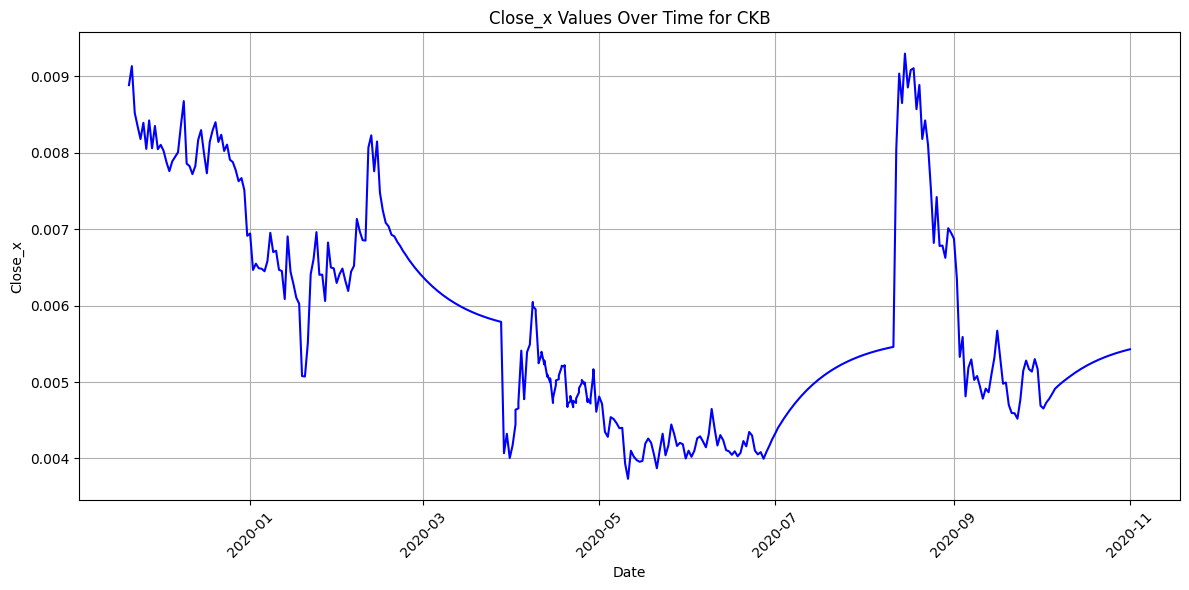

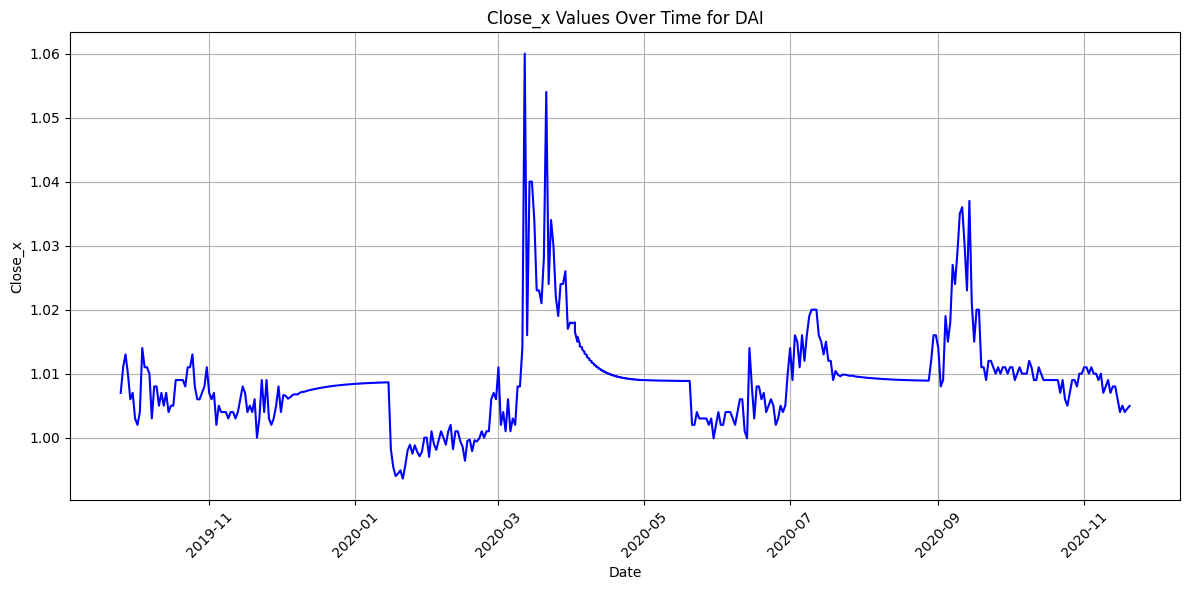

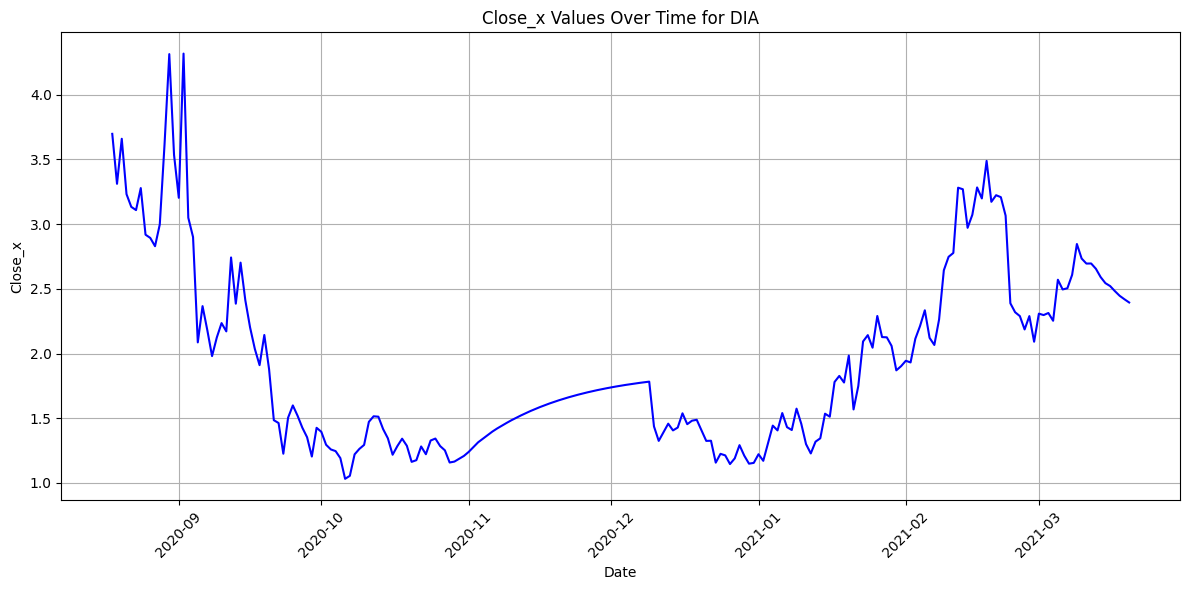

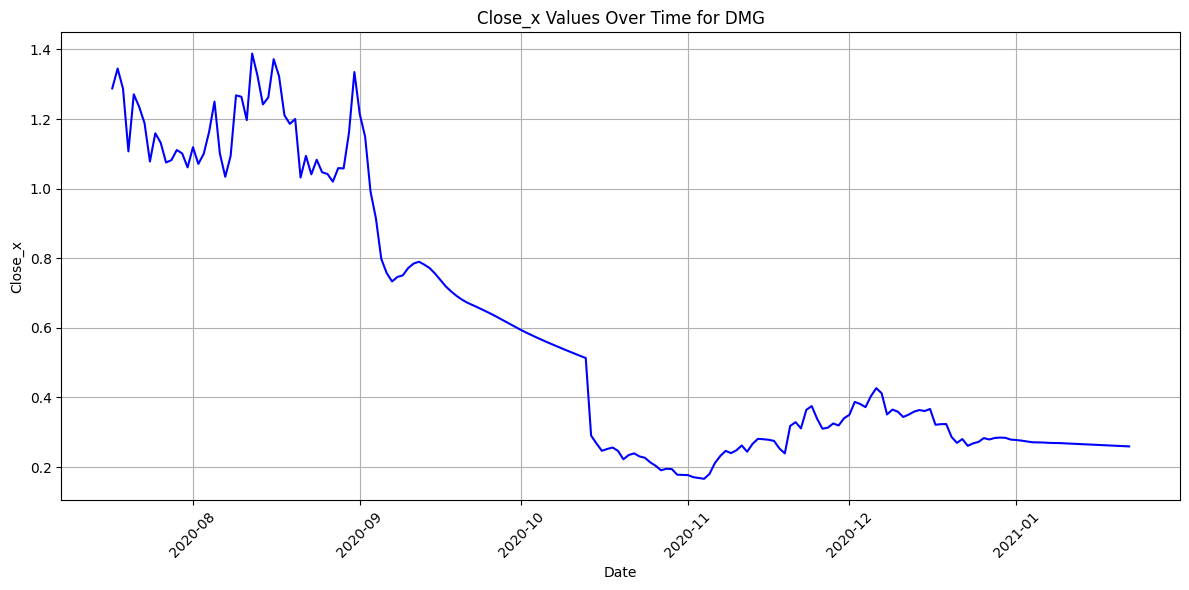

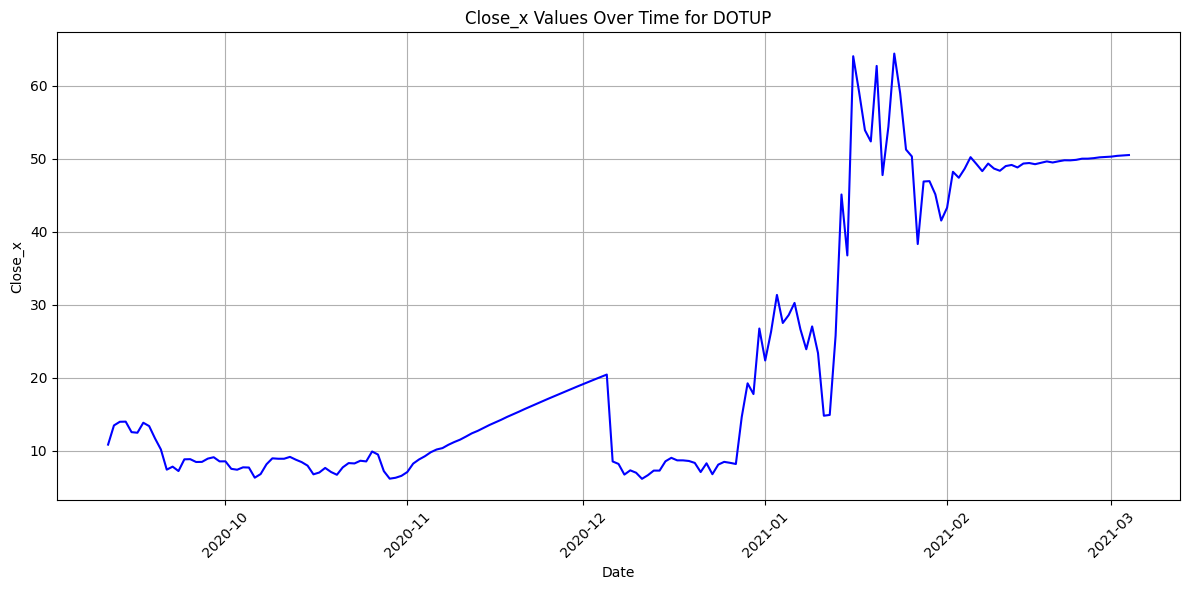

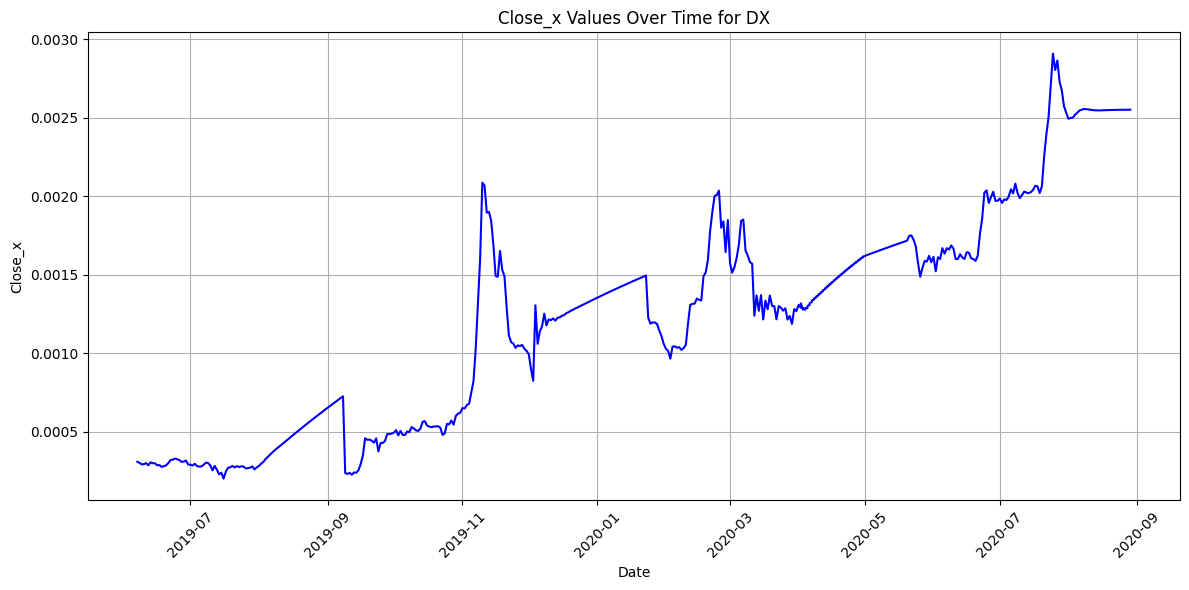

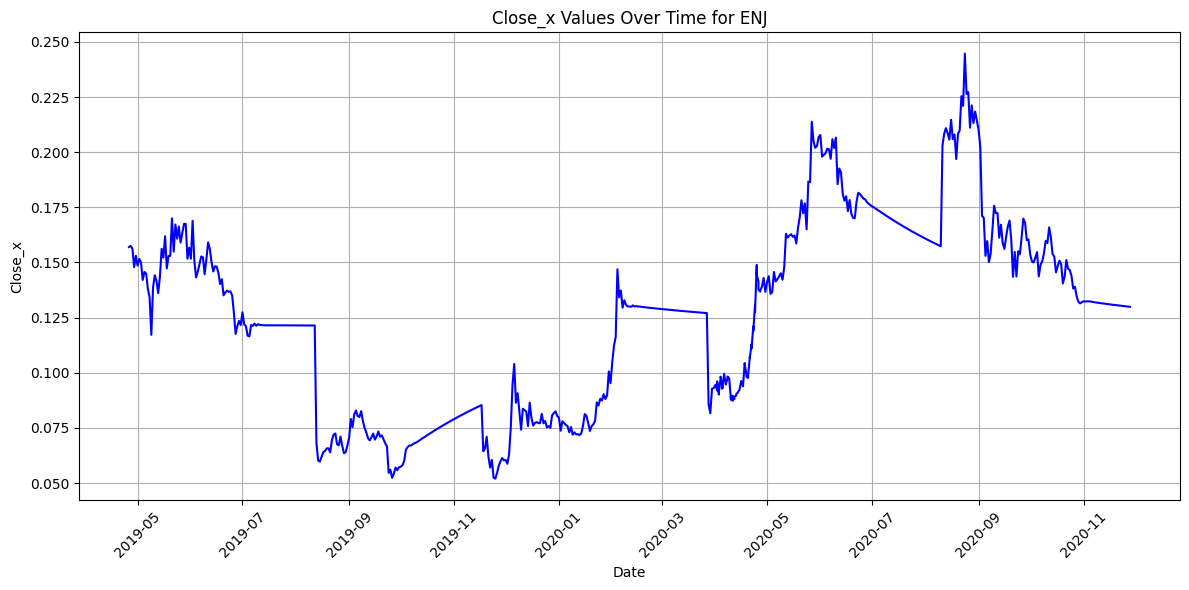

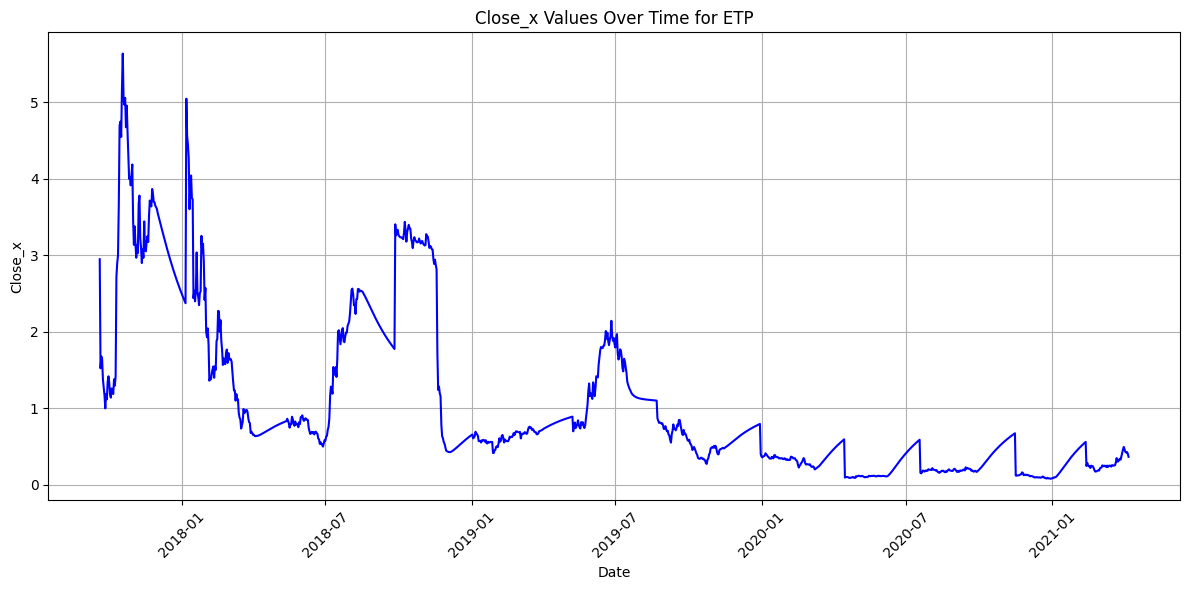

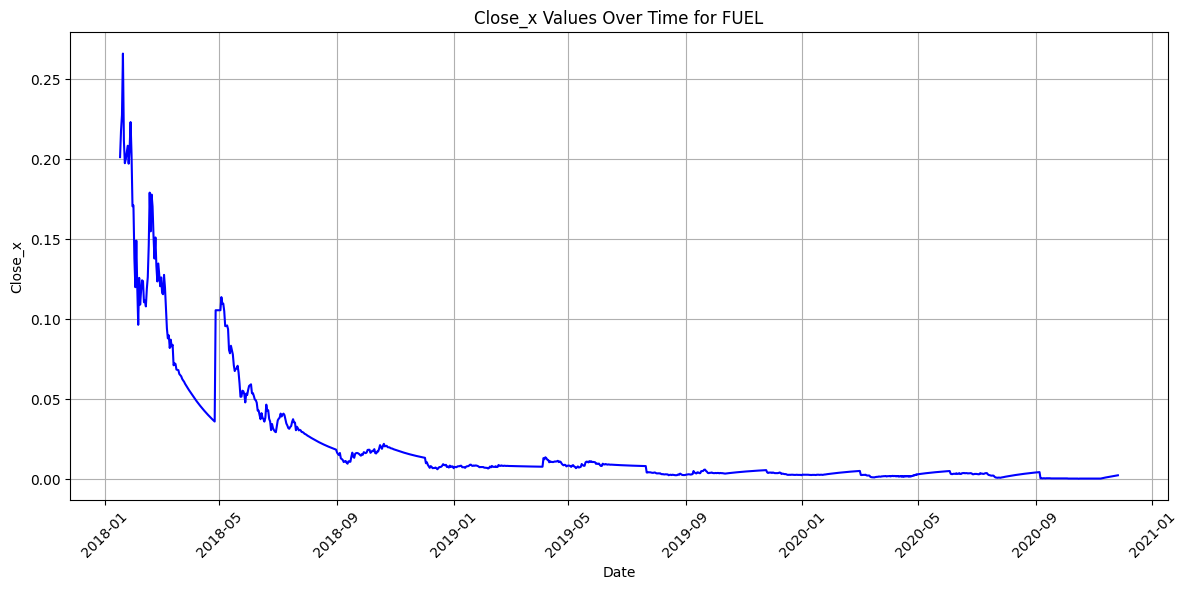

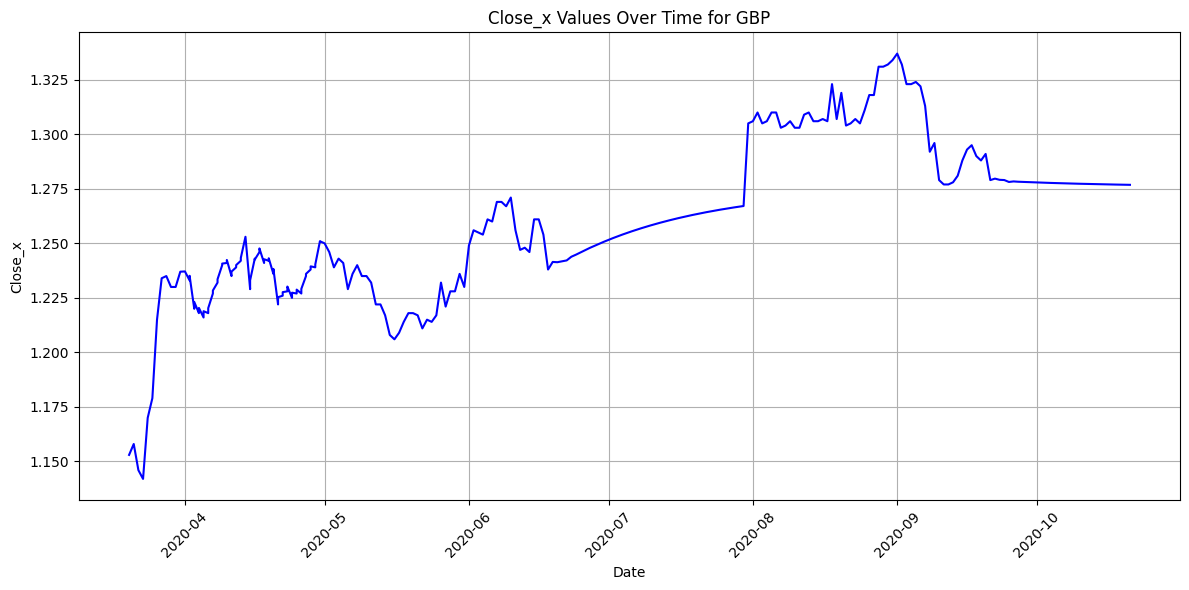

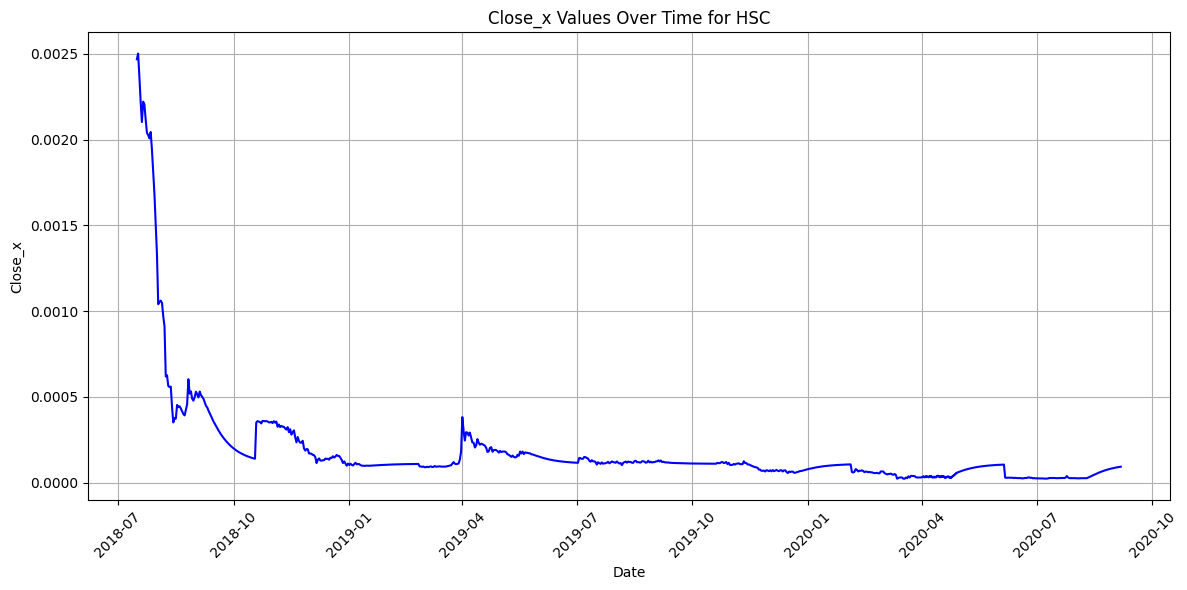

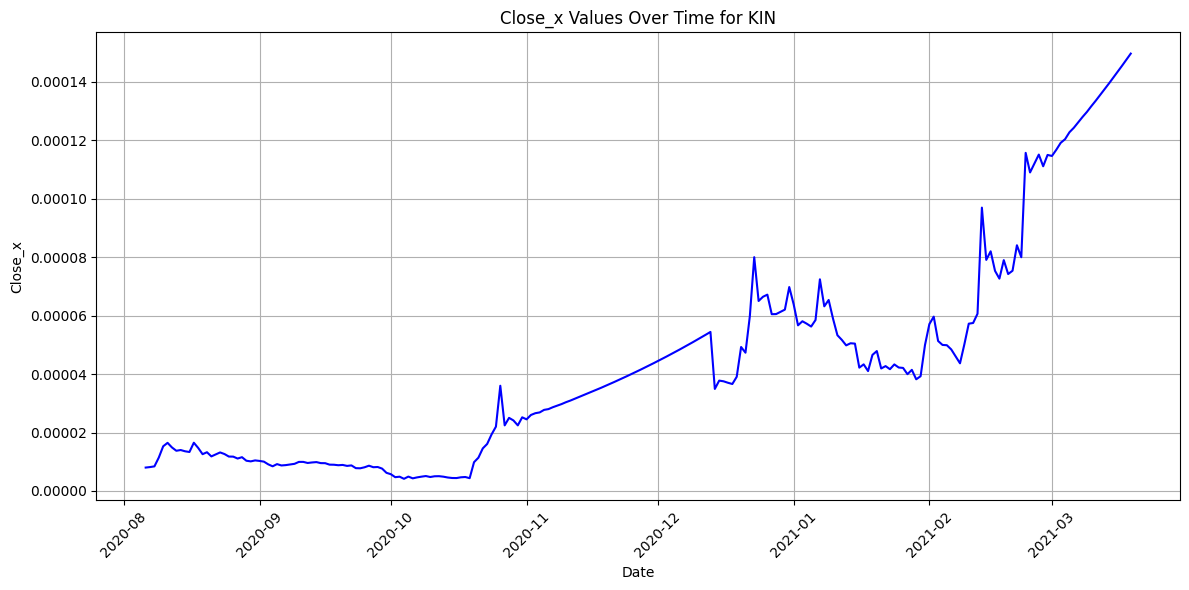

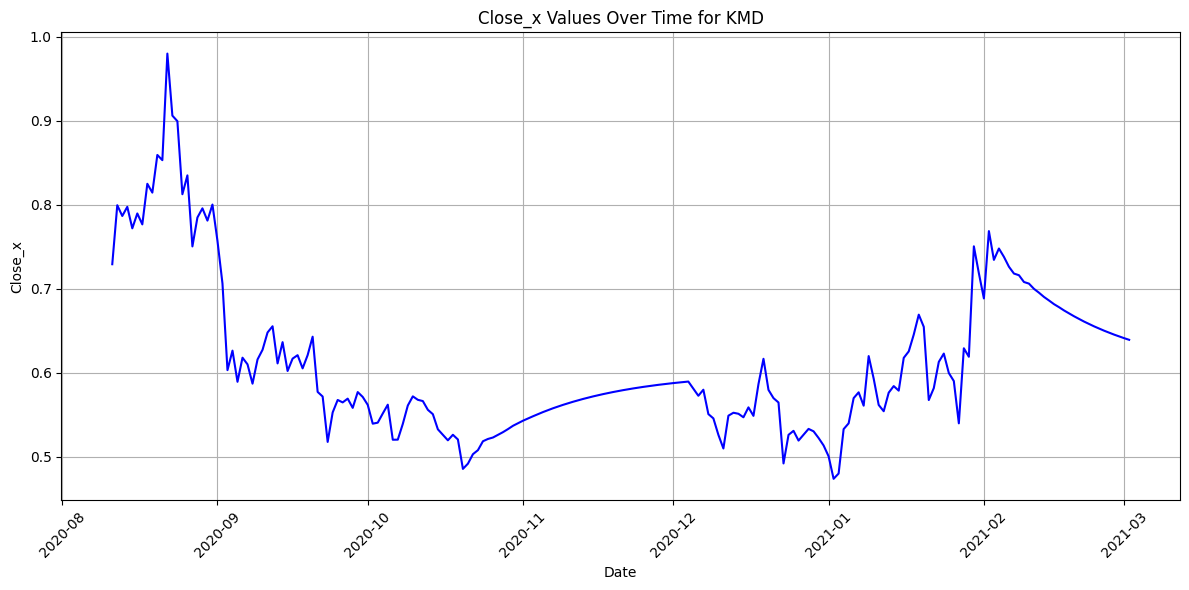

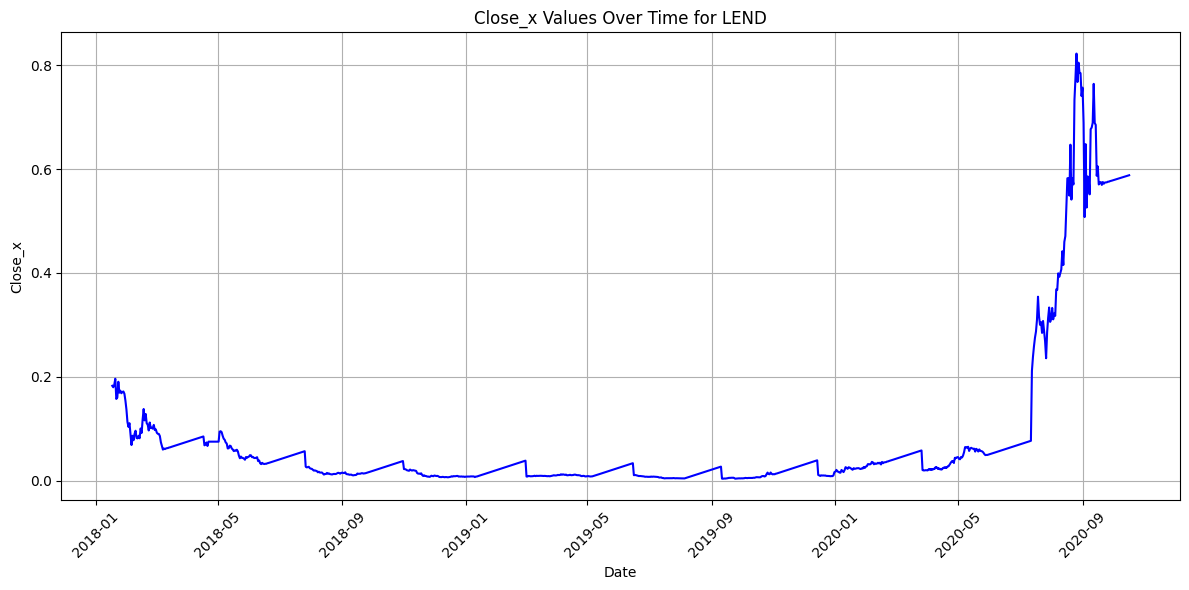

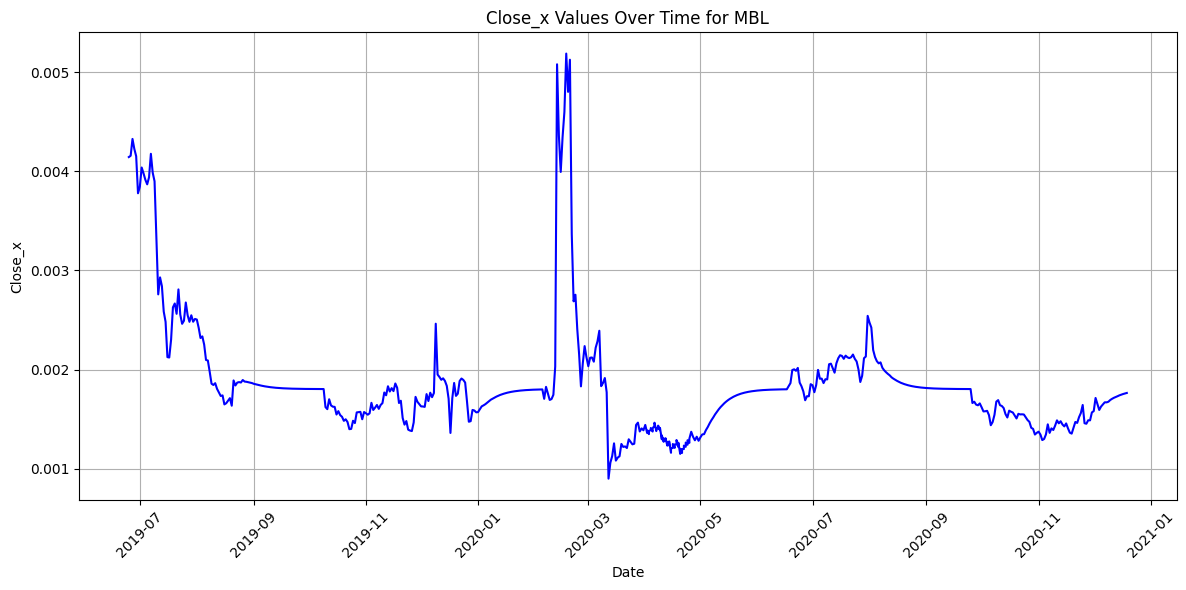

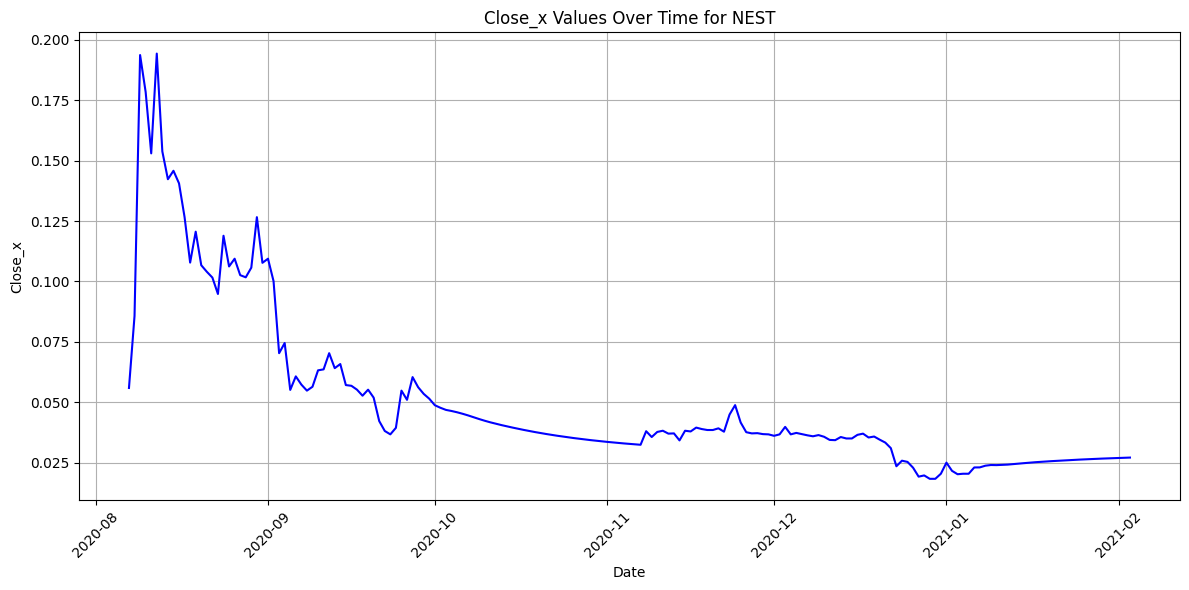

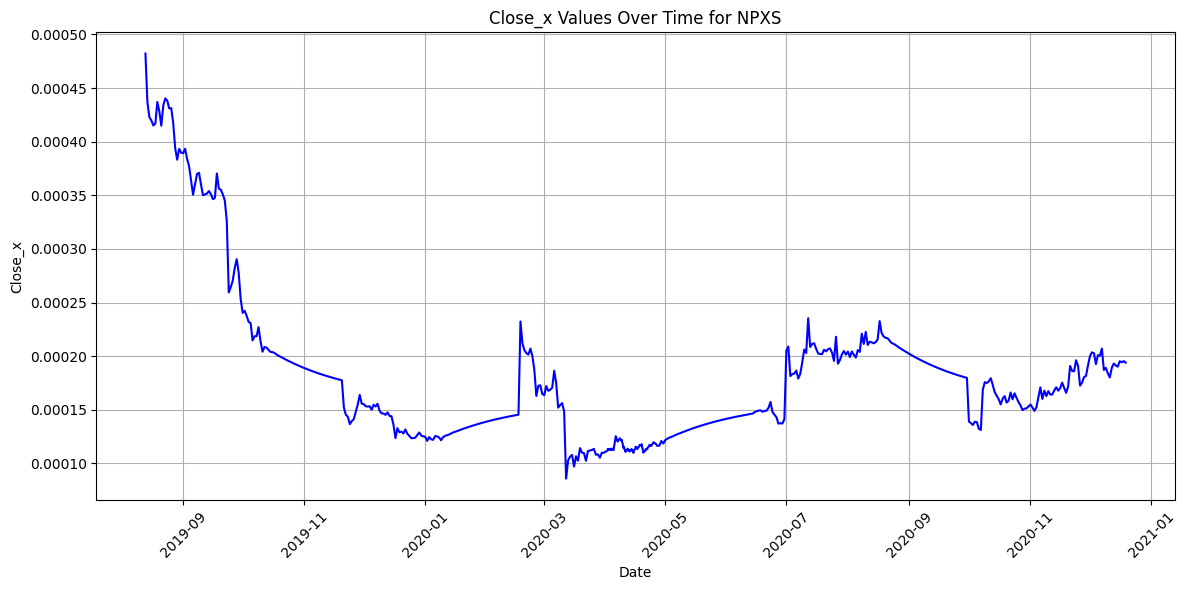

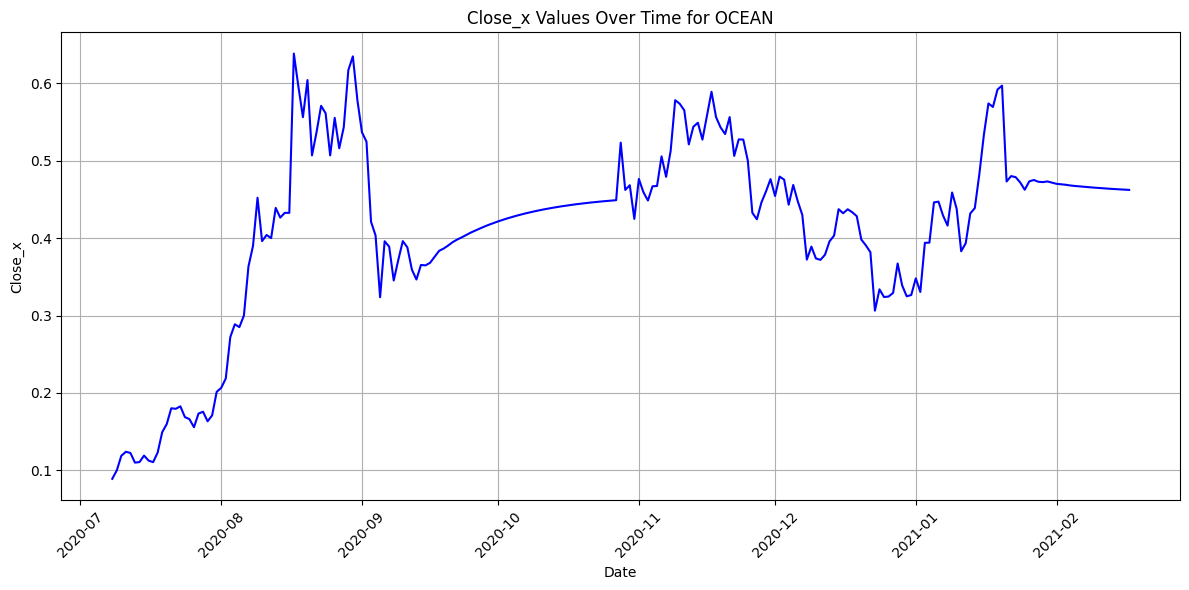

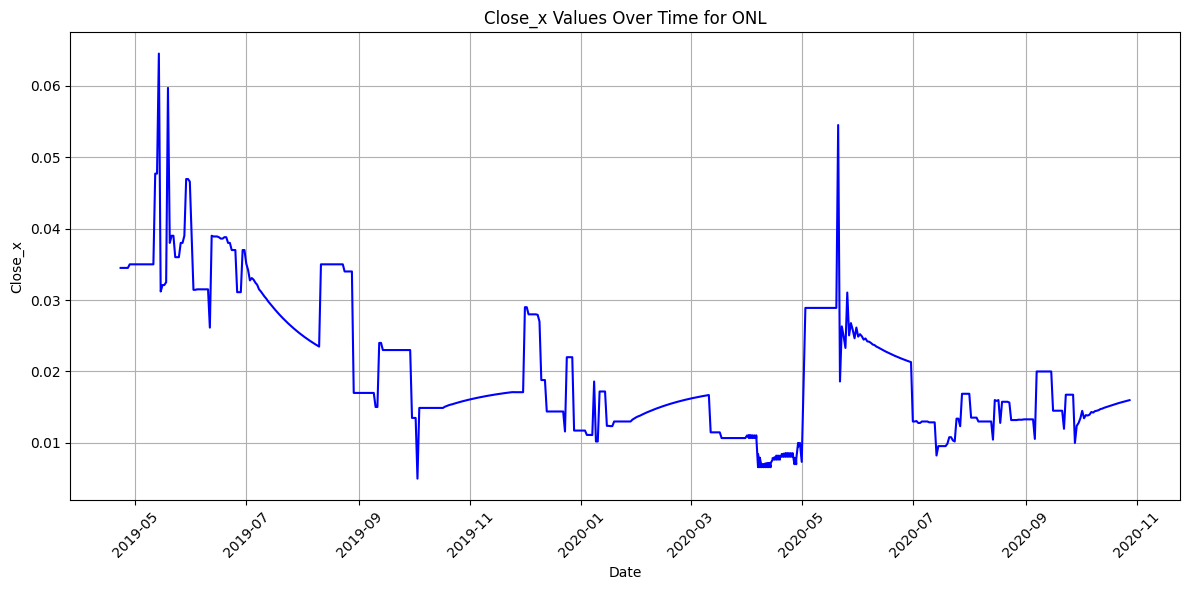

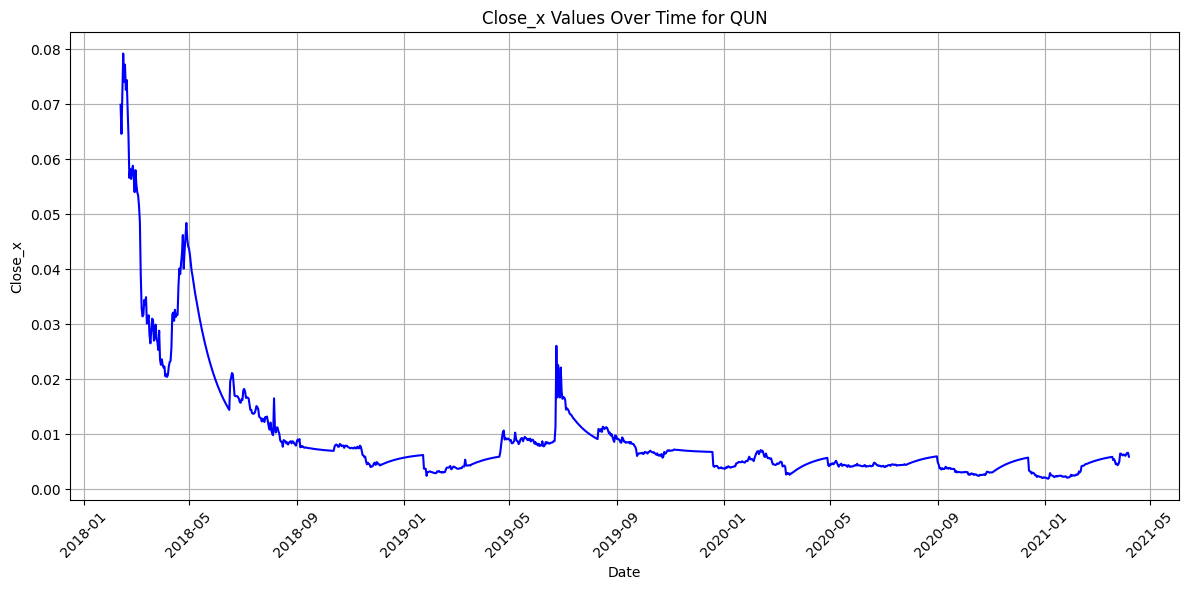

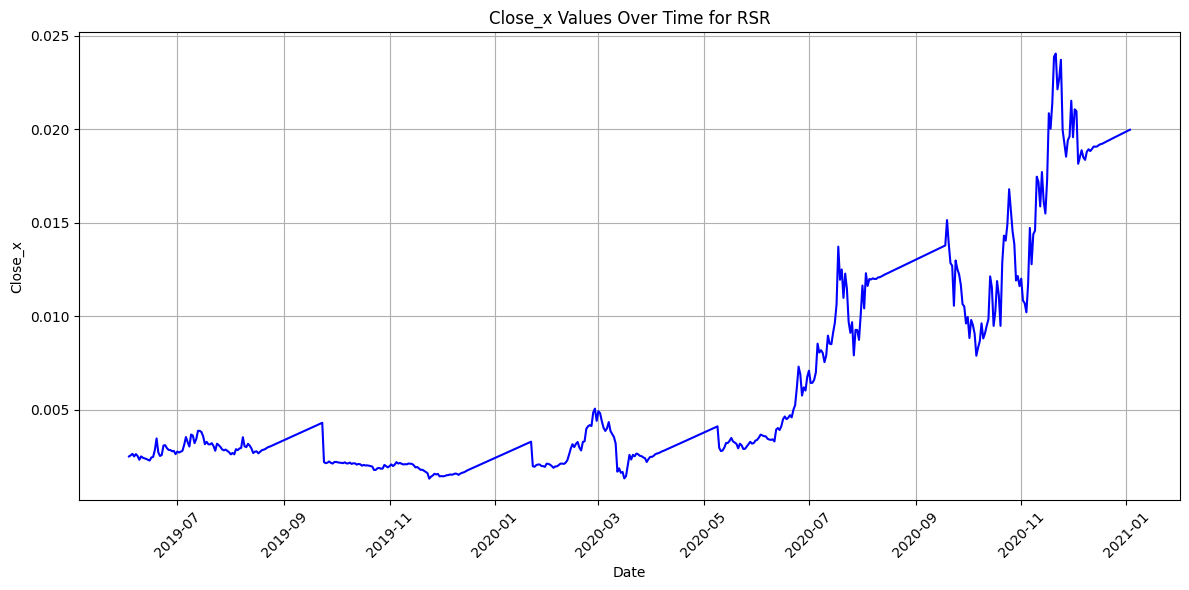

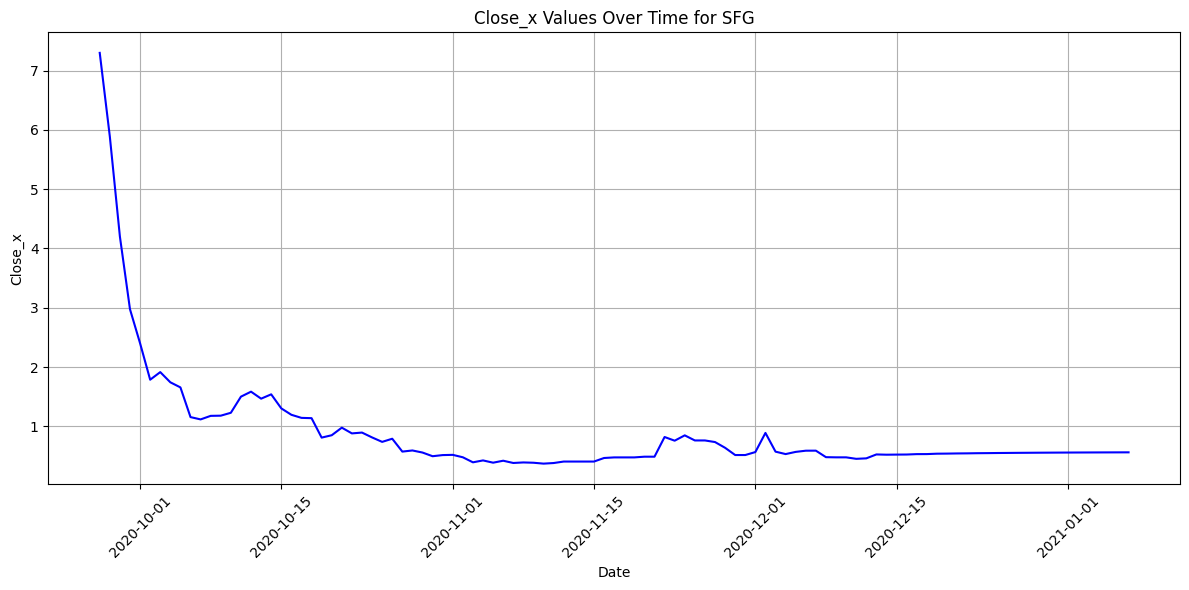

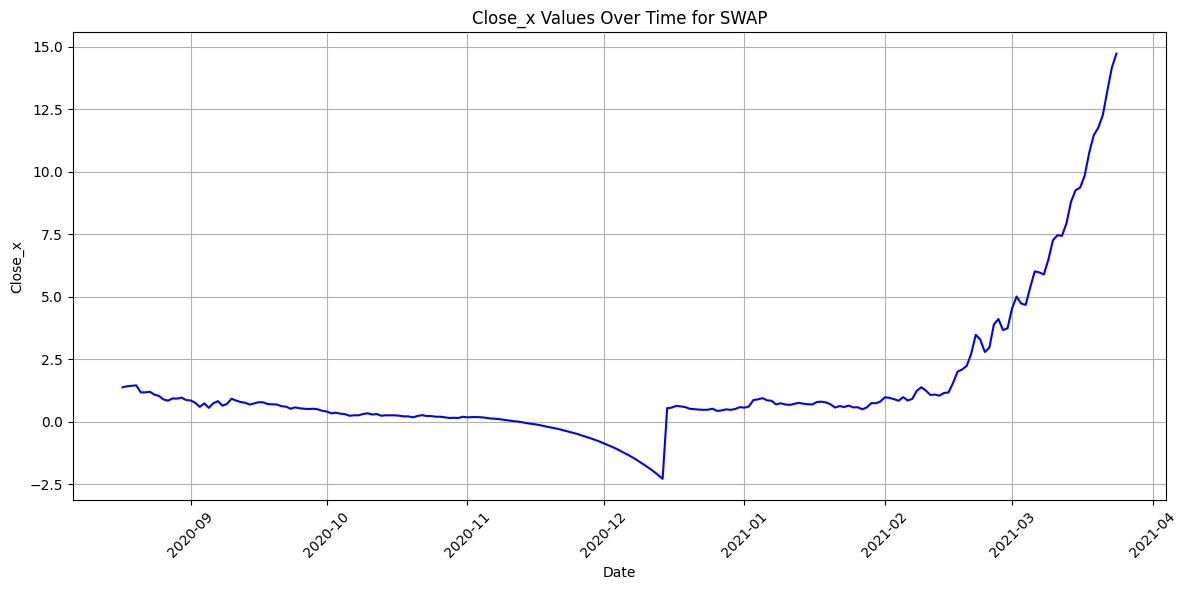

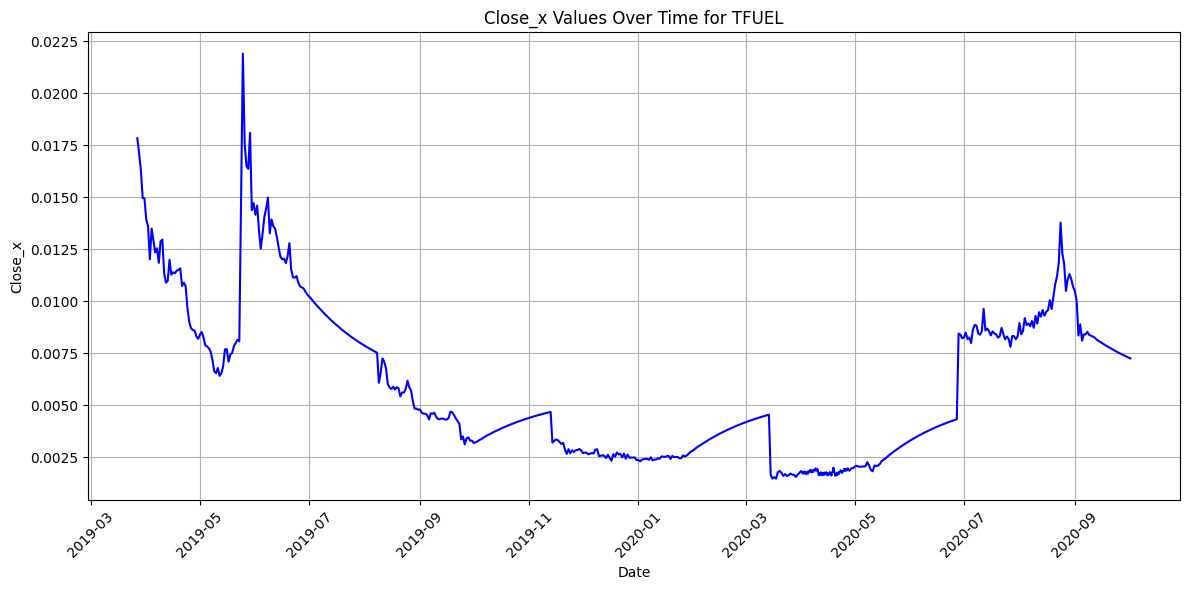

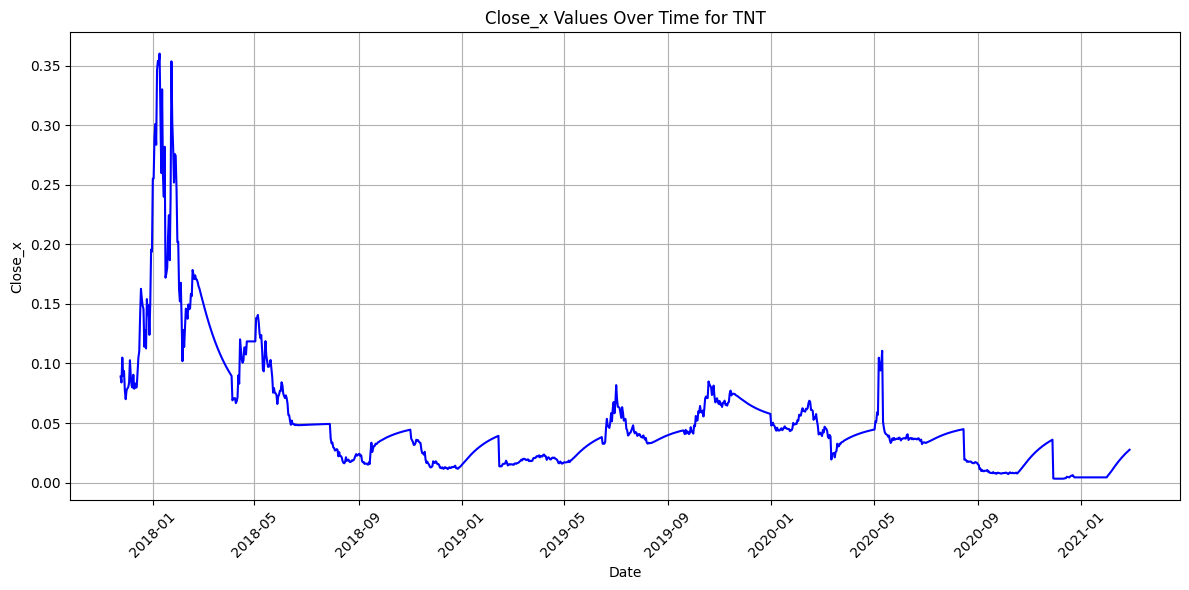

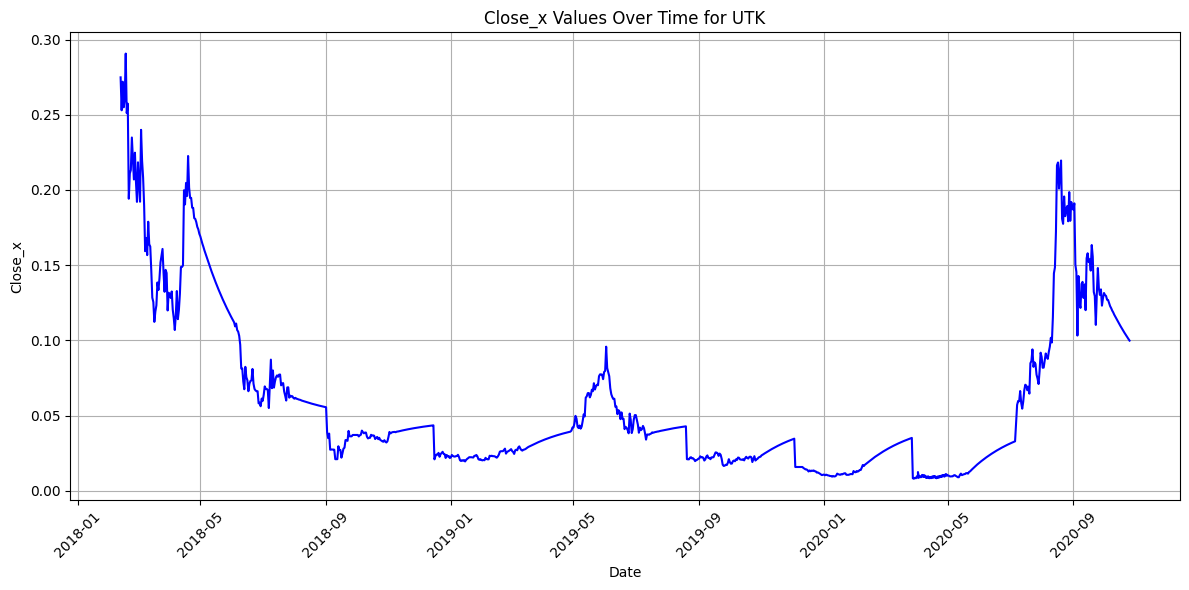

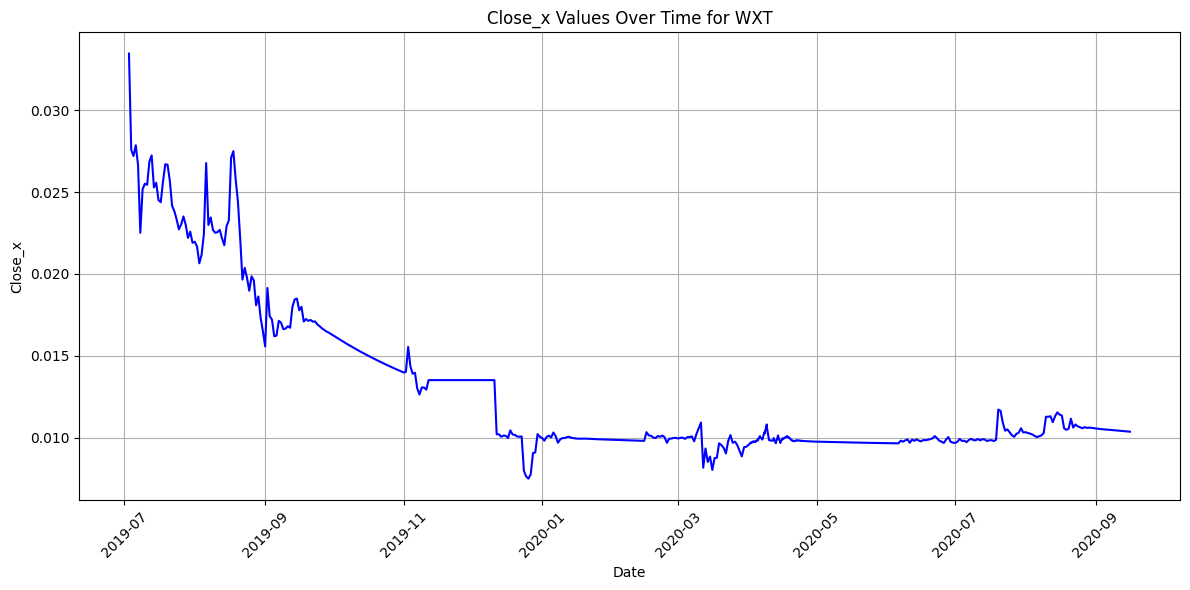

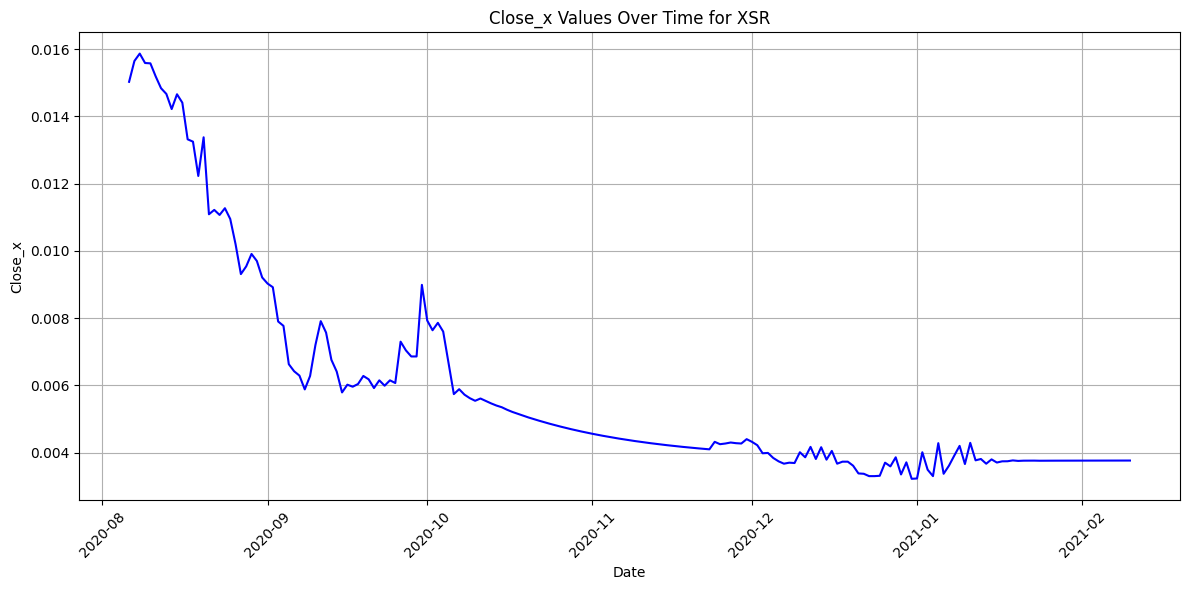

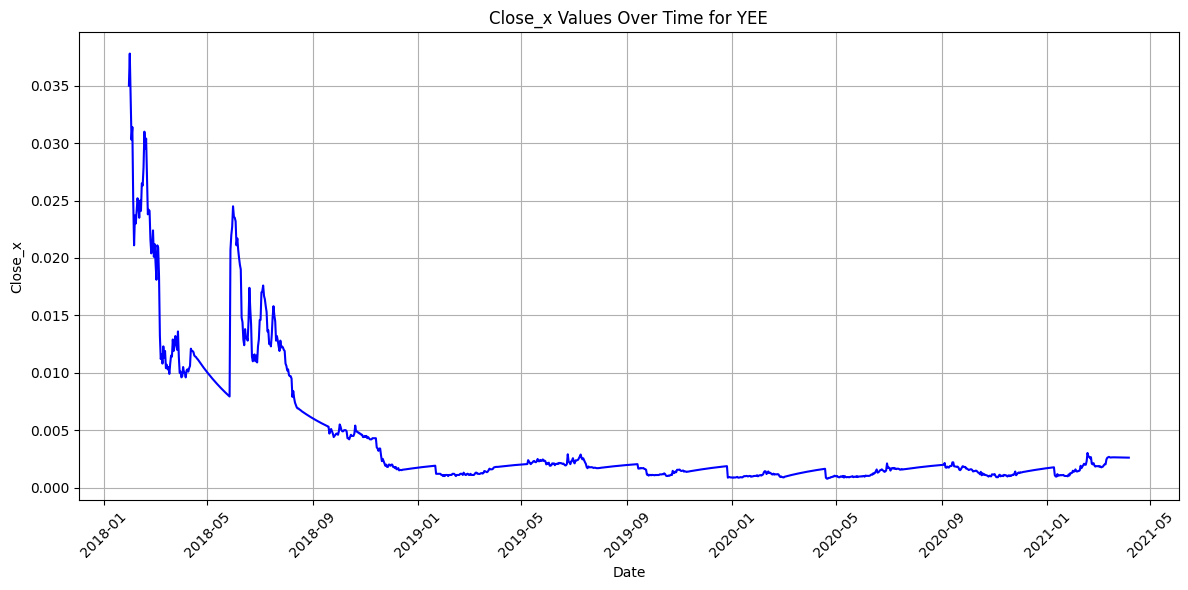

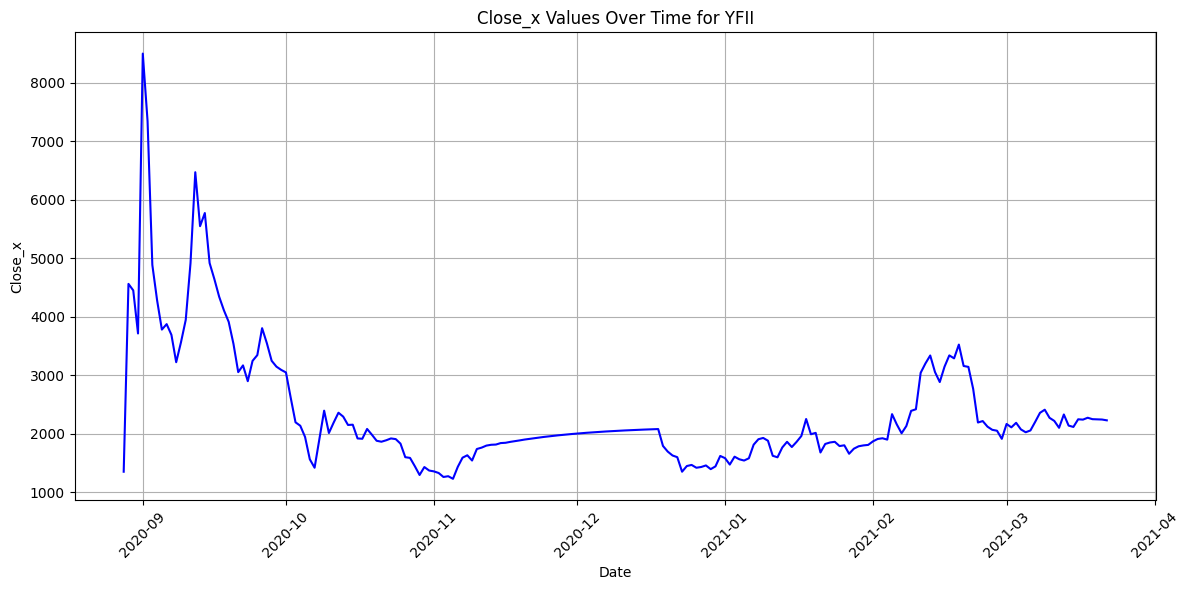

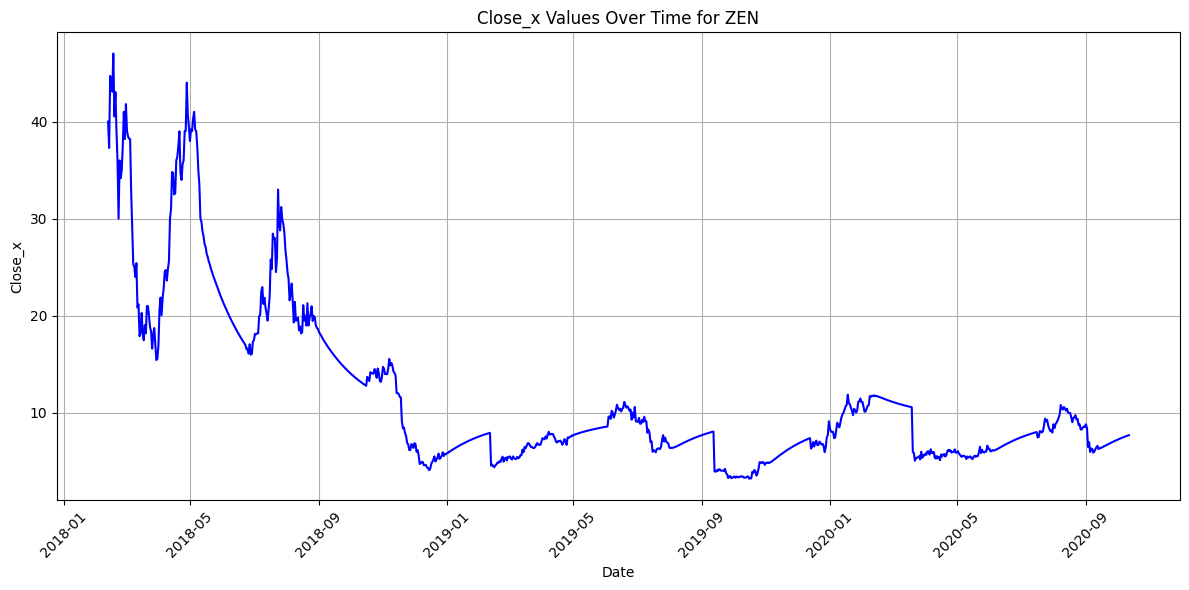

In [50]:
import matplotlib.pyplot as plt

# Loop through each combined dataframe to plot close_x
for key, combined_df in combined_dataframes_pd.items():
    plt.figure(figsize=(12, 6))
    
    # Plotting close_x values without markers
    plt.plot(combined_df['datetime'], combined_df['close_x'], linestyle='-', color='blue')
    
    # Adding titles and labels
    plt.title(f'Close_x Values Over Time for {key}')
    plt.xlabel('Date')
    plt.ylabel('Close_x')
    
    # Formatting the x-axis for better readability
    plt.xticks(rotation=45)
    plt.grid()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [56]:
import os
import pandas as pd

# Create a folder to store submission files
submission_folder = 'submission_folder'
os.makedirs(submission_folder, exist_ok=True)

# Create an empty dataframe to store all submissions
all_submissions = pd.DataFrame()

# Loop through each combined dataframe to create a single submission file
for key, combined_df in combined_dataframes_pd.items():
    # Filter the dataframe for test data (is_test = True)
    test_df = combined_df[combined_df['is_test'] == True]
    
    # Create a new dataframe with 'company', 'datetime', and 'close_x' columns
    submission_df = test_df[['close_x', 'datetime']].copy()
    submission_df['company'] = key  # Add the crypto name as a new column
    
    # Rename 'close_x' to 'close' for submission format
    submission_df = submission_df.rename(columns={'close_x': 'close'})
    
    # Ensure datetime is in the correct format
    submission_df['datetime'] = pd.to_datetime(submission_df['datetime']).dt.strftime('%Y-%m-%d')
    
    # Reorder columns to company, datetime, close
    submission_df = submission_df[['company', 'datetime', 'close']]
    
    # Sort by datetime
    submission_df = submission_df.sort_values('datetime')
    
    # Append to the all_submissions dataframe
    all_submissions = pd.concat([all_submissions, submission_df], ignore_index=True)

# Create the submission file path
file_path = os.path.join(submission_folder, 'final_submission.csv')

# Save the combined submission file
all_submissions.to_csv(file_path, index=False)

print(f"Combined submission file created: {file_path}")

# Optionally, you can print out the first few rows of the combined submission file to verify
print("\nFirst few rows of combined_submission.csv:")
print(pd.read_csv(file_path).head())

Combined submission file created: submission_folder\final_submission.csv

First few rows of combined_submission.csv:
  company    datetime     close
0     AGI  2018-07-28  0.086942
1     AGI  2018-07-29  0.086279
2     AGI  2018-07-30  0.083561
3     AGI  2018-07-31  0.083829
4     AGI  2018-08-01  0.083180
